# Algoritmos de optimización - Reto 1

Nombre: Pedro Luis Soto Santos 
</br>
Github: https://github.com/plss12/03MAIR---Algoritmos-de-Optimizacion/blob/main/Reto%201/Algoritmos_R1.ipynb

In [30]:
import time
import matplotlib.pyplot as plt

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [31]:
# Torres de Hanoi

def torre_hanoi(n, origen, destino, auxiliar, num_movs=0):
    if n == 1:
        print(f"Mover disco de {origen} a {destino}")
        return num_movs+1
    
    else:
        num_movs = torre_hanoi(n-1, origen, auxiliar, destino, num_movs)
        print(f"Mover disco de {origen} a {destino}")
        num_movs = torre_hanoi(n-1, auxiliar, destino, origen, num_movs)
        
    return num_movs+1

In [32]:
num_fichas = 3
num_movs = torre_hanoi(num_fichas, "Torre A", "Torre C", "Torre B")

print(f"Numero de movimientos para una torre de Hanoi de {num_fichas} fichas: {num_movs}")

Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Numero de movimientos para una torre de Hanoi de 3 fichas: 7


In [33]:
num_fichas = 5
num_movs = torre_hanoi(num_fichas, "Torre A", "Torre C", "Torre B")

print(f"Numero de movimientos para una torre de Hanoi de {num_fichas} fichas: {num_movs}")

Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre C a Torre A
Mover disco de Torre B a Torre A
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre C a Torre B
Mover disco de Torre C a Torre A
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disc

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

In [34]:
#Sucesión_de_Fibonacci

def fibonacci_iterativo(n):
    if n <=1:
        return n
        
    n0, n1 = 0, 1
    for _ in range(2, n+1):
        n0, n1 = n1, n0+n1
        
    return n1

def fibonacci_recursivo(n):
    if n <=1:
        return n
    
    return fibonacci_recursivo(n-1)+fibonacci_recursivo(n-2)

def fibonacci_recursivo_memorizado(n, memo={}):
    if n <=1:
        return n
    
    if n in memo:
        return memo[n]
    
    memo[n] = fibonacci_recursivo_memorizado(n-1) + fibonacci_recursivo_memorizado(n-2)
    return memo[n]

In [35]:
print(fibonacci_iterativo(10))
print(fibonacci_recursivo(10))
print(fibonacci_recursivo_memorizado(10))

55
55
55


In [36]:
print(fibonacci_iterativo(20))
print(fibonacci_recursivo(20))
print(fibonacci_recursivo_memorizado(20))

6765
6765
6765


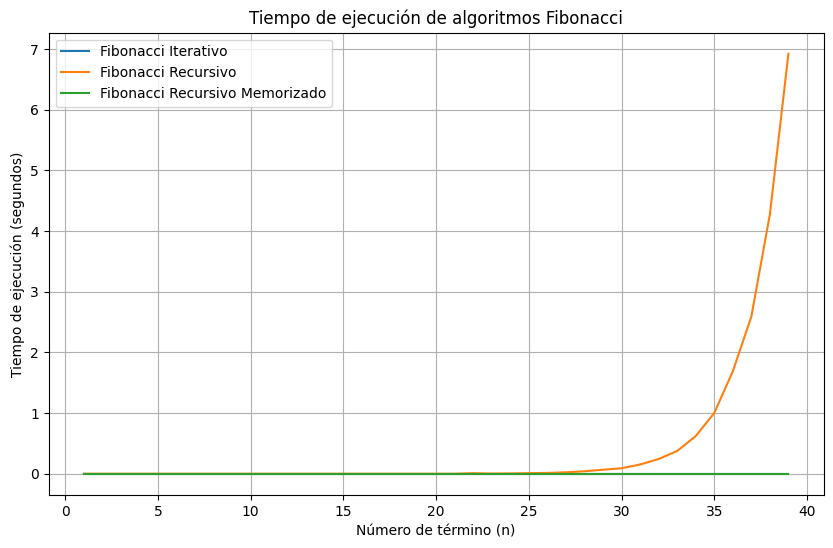

In [37]:
valores_n = list(range(1, 40))

tiempos_iterativo = []
tiempos_recursivo = []
tiempos_recursivo_memorizado = []

# Tiempos para el algoritmo iterativo
for n in valores_n:
    inicio = time.time()
    fibonacci_iterativo(n)
    fin = time.time()
    tiempos_iterativo.append(fin - inicio)

# Tiempos para el algoritmo recursivo
for n in valores_n:
    inicio = time.time()
    fibonacci_recursivo(n)
    fin = time.time()
    tiempos_recursivo.append(fin - inicio)

# Tiempos para el algoritmo recursivo memorizado
for n in valores_n:
    inicio = time.time()
    fibonacci_recursivo_memorizado(n)
    fin = time.time()
    tiempos_recursivo_memorizado.append(fin - inicio)

plt.figure(figsize=(10, 6))
plt.plot(valores_n, tiempos_iterativo, label='Fibonacci Iterativo')
plt.plot(valores_n, tiempos_recursivo, label='Fibonacci Recursivo')
plt.plot(valores_n, tiempos_recursivo_memorizado, label='Fibonacci Recursivo Memorizado')
plt.xlabel('Número de término (n)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de algoritmos Fibonacci')
plt.legend()
plt.grid(True)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [38]:
# Problema del cambio de moneda

def cambio_monedas(cantidad, sistema):
    res = [0 for _ in range(len(sistema))]
    
    for i, valor in enumerate(sistema):
        res[i] = cantidad // valor
        cantidad %= valor

    return res

def cambio_monedas(cantidad, sistema):
    res = []
    sistema.sort(reverse=True)

    for moneda in sistema:
        while cantidad >= moneda:
            res.append(moneda)
            cantidad -= moneda
            
    return res

In [39]:
sistema = [50, 20, 10, 5, 2, 1]
print(cambio_monedas(79, sistema))
print(cambio_monedas(147, sistema))

[50, 20, 5, 2, 2]
[50, 50, 20, 20, 5, 2]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [ ]:
# Problema de las N-Reinas

def n_reinas(n):
    soluciones = []

    def sol_reinas(posiciones=[-1]*n, fila=0):
        # Si todas las reinas están colocadas es una solución
        if fila == n:
            soluciones.append(posiciones[:])

        else:
            # Recorremos todas las columnas y las filas anteriores
            for col in range(n):
                valido = True
                
                for i in range(fila):
                    # Comprobamos con la fórmula si la reina de la fila ataca la nueva posición
                    # i==k o i-j = k-l o i+j = k-l
                    if posiciones[i] == col or i - posiciones[i] == fila - col or i + posiciones[i] == fila + col:
                        valido = False
                        break
                # Si no está atacada, la posición es valida
                if valido:
                    posiciones[fila] = col
                    sol_reinas(posiciones, fila + 1)
    
    sol_reinas()
    return soluciones

In [ ]:
n = 6
soluciones = n_reinas(n)

# Las soluciones vienen representadas por una lista de tamaño n en la que cada posición es 
# una fila del tablero y el valor es la columna en la que está colocada la reina
print(f"Número de posibles tableros de tamaño {n}x{n}: {len(soluciones)}")
for solucion in soluciones:
    print(solucion)

Número de posibles tableros de tamaño 6x6: 4
[1, 3, 5, 0, 2, 4]
[2, 5, 1, 4, 0, 3]
[3, 0, 4, 1, 5, 2]
[4, 2, 0, 5, 3, 1]


In [ ]:
n = 8
soluciones = n_reinas(n)

# Las soluciones vienen representadas por una lista de tamaño n en la que cada posición es 
# una fila del tablero y el valor es la columna en la que está colocada la reina
print(f"Número de posibles tableros de tamaño {n}x{n}: {len(soluciones)}")
for solucion in soluciones:
    print(solucion)

Número de posibles tableros de tamaño 8x8: 92
[0, 4, 7, 5, 2, 6, 1, 3]
[0, 5, 7, 2, 6, 3, 1, 4]
[0, 6, 3, 5, 7, 1, 4, 2]
[0, 6, 4, 7, 1, 3, 5, 2]
[1, 3, 5, 7, 2, 0, 6, 4]
[1, 4, 6, 0, 2, 7, 5, 3]
[1, 4, 6, 3, 0, 7, 5, 2]
[1, 5, 0, 6, 3, 7, 2, 4]
[1, 5, 7, 2, 0, 3, 6, 4]
[1, 6, 2, 5, 7, 4, 0, 3]
[1, 6, 4, 7, 0, 3, 5, 2]
[1, 7, 5, 0, 2, 4, 6, 3]
[2, 0, 6, 4, 7, 1, 3, 5]
[2, 4, 1, 7, 0, 6, 3, 5]
[2, 4, 1, 7, 5, 3, 6, 0]
[2, 4, 6, 0, 3, 1, 7, 5]
[2, 4, 7, 3, 0, 6, 1, 5]
[2, 5, 1, 4, 7, 0, 6, 3]
[2, 5, 1, 6, 0, 3, 7, 4]
[2, 5, 1, 6, 4, 0, 7, 3]
[2, 5, 3, 0, 7, 4, 6, 1]
[2, 5, 3, 1, 7, 4, 6, 0]
[2, 5, 7, 0, 3, 6, 4, 1]
[2, 5, 7, 0, 4, 6, 1, 3]
[2, 5, 7, 1, 3, 0, 6, 4]
[2, 6, 1, 7, 4, 0, 3, 5]
[2, 6, 1, 7, 5, 3, 0, 4]
[2, 7, 3, 6, 0, 5, 1, 4]
[3, 0, 4, 7, 1, 6, 2, 5]
[3, 0, 4, 7, 5, 2, 6, 1]
[3, 1, 4, 7, 5, 0, 2, 6]
[3, 1, 6, 2, 5, 7, 0, 4]
[3, 1, 6, 2, 5, 7, 4, 0]
[3, 1, 6, 4, 0, 7, 5, 2]
[3, 1, 7, 4, 6, 0, 2, 5]
[3, 1, 7, 5, 0, 2, 4, 6]
[3, 5, 0, 4, 1, 7, 2, 6]
[3, 5, 7, 1, 6, 0, 2, 4]
[3, 